# Arrays: Working with Images

In [2]:
import matplotlib.image as mpimg

#load image
filename = "MarshOrchid.jpg"
image = mpimg.imread(filename)

#print out its shape
print image.shape

(5528, 3685, 3)


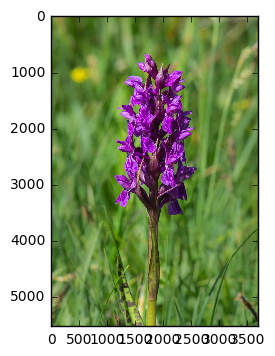

In [4]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

## Geometric Manipulations

The first transformation we will perform is a transpose, turning the image 90 degrees counter-clockwise

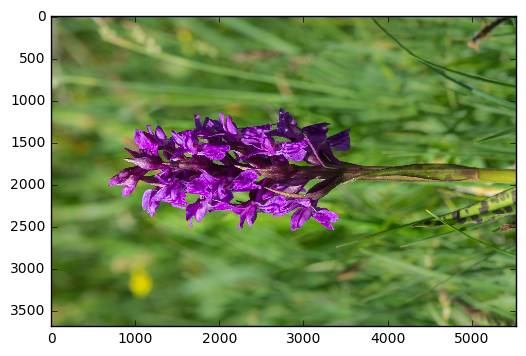

In [4]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#First, load the image again
filename = "MarshOrchid.jpg"
image = mpimg.imread(filename)

#Creat a Tensorflow Variable
x = tf.Variable(image, name ='x')

model = tf.initialize_all_variables()

with tf.Session() as sess:
    x = tf.transpose(x, perm =[1, 0, 2])
    x = tf.reverse_sequence(x, [width] * height, 0, batch_dim = 1)
    sess.run(model)
    result = sess.run(x)
    
#Show the final image
plt.imshow(result)
plt.show()



The next manipulation we will do is a flip (left-right), swapping the pixels from one side to another.

(5528, 3685, 3)


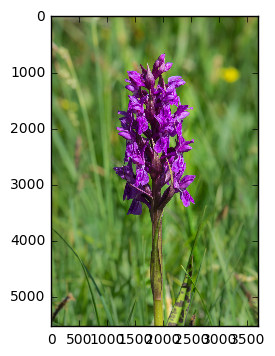

In [14]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

#First, load the image again
filename = "MarshOrchid.jpg"
image = mpimg.imread(filename)
height, width, depth = image.shape

#Creat a Tensorflow Variable
x = tf.Variable(image, name ='x')

model = tf.initialize_all_variables()

with tf.Session() as sess:
    x = tf.reverse_sequence(x, np.ones((height,)) * width, 1, batch_dim=0)
    sess.run(model)
    result = sess.run(x)
    
print(result.shape)
plt.imshow(result)
plt.show()

## Exercise

（1）Combine the transposing code with the flip code to rotate clock wise

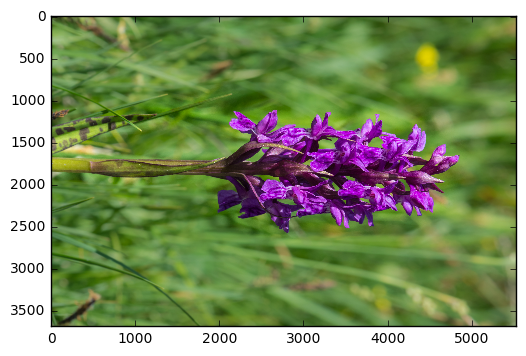

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# First, load the image
filename = "MarshOrchid.jpg"
image = plt.imread(filename)
height, width, depth = image.shape

# Create a TensorFlow Variable to store the image.
# This doesn't need to be a variable, as we have the data now, and it won't change.
x = tf.Variable(image, name='x')
model = tf.initialize_all_variables()

with tf.Session() as session:
    # Use TensorFlow's built in transpose function to rotate the image.
    # The perm parameter essentially reorders the axis, in this case, swapping 0 and 1
    x = tf.transpose(x, perm=[1, 0, 2])
    # Use reverse_sequence to flip the image. This has the effect of rotating the other way.
    x = tf.reverse_sequence(x, np.ones((width,)) * height, 1, batch_dim=0)
    session.run(model)
    result = session.run(x)

# Show the image
plt.imshow(result)
plt.show()

(2)Currently, the flip code (using reverse_sequence) requires width to be precomputed. Look at the documentation for the tf.shape function, and use it to compute the width of the x variable within the session.

(5528, 3685, 3)


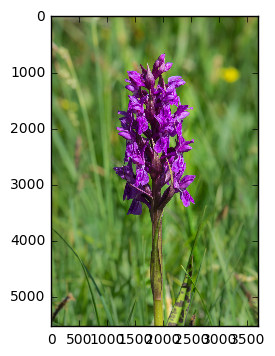

In [7]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

#First, load the image again
filename = "MarshOrchid.jpg"
image = mpimg.imread(filename)

#Creat a Tensorflow Variable
x = tf.Variable(image, name ='x')
shape = tf.shape(x)
model = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(model)
    shape = sess.run(shape)
    x = tf.reverse_sequence(x, np.ones((shape[0],)) * shape[1], 1, batch_dim=0)
    result = sess.run(x)
    
print(result.shape)
plt.imshow(result)
plt.show()

(3）Perform a “flipud”, which flips the image top-to-bottom.

(5528, 3685, 3)


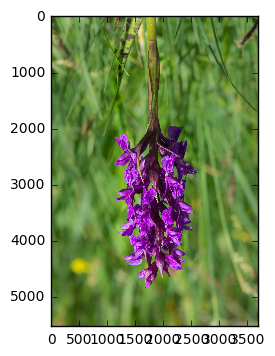

In [11]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#First, load the image again
filename = "MarshOrchid.jpg"
image = mpimg.imread(filename)
height, width, depth = image.shape

#Creat a Tensorflow Variable
x = tf.Variable(image, name ='x')

model = tf.initialize_all_variables()

with tf.Session() as sess:
    x = tf.reverse_sequence(x, [height] * width, 0, batch_dim = 1)
    sess.run(model)
    result = sess.run(x)
    
print(result.shape)
plt.imshow(result)
plt.show()

(4)Compute a “mirror”, where the first half of the image is copied, flipped (l-r) and then copied into the second half.



('Original', (5528, 3685, 3))
(5528, 3684, 3)


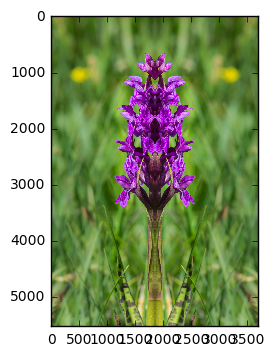

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image again
filename = "MarshOrchid.jpg"
image = mpimg.imread(filename)
height, width, depth = image.shape
print("Original", image.shape)

#Create Tensorflow model
x = tf.Variable(image, name = 'x')

model = tf.initialize_all_variables()

mask = np.ones((height, )) * (width / 2)

with tf.Session() as sess:
    #Get the left side of image
    left_side = tf.slice(x, [0, 0, 0], [-1, width//2, -1])
    #Get the right side of image
    mirror = tf.reverse_sequence(left_side, mask, 1, batch_dim = 0)
    stich = tf.concat(1, [left_side, mirror])
    sess.run(model)
    result = sess.run(stich)
    
print("Mirrored", result.shape)
plt.imshow(result)
plt.show()
    